In [14]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input150sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


0.91015625
0.984375
0.98046875
0.93359375
0.94921875
0.94140625
0.96875
0.9609375
0.9453125
0.9140625


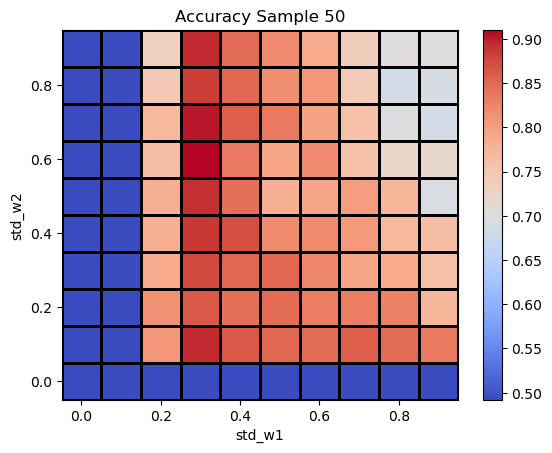

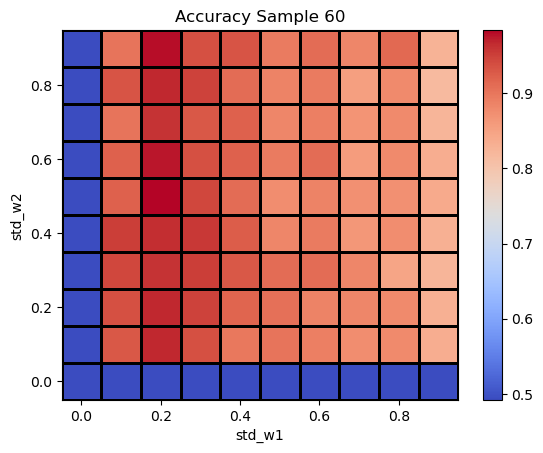

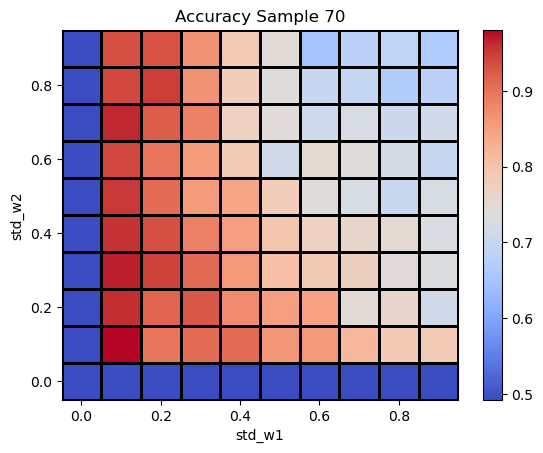

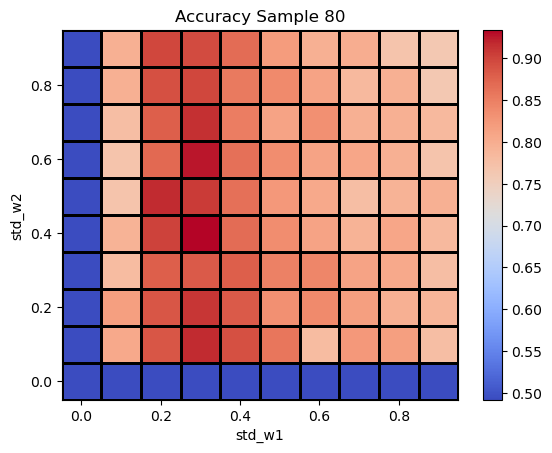

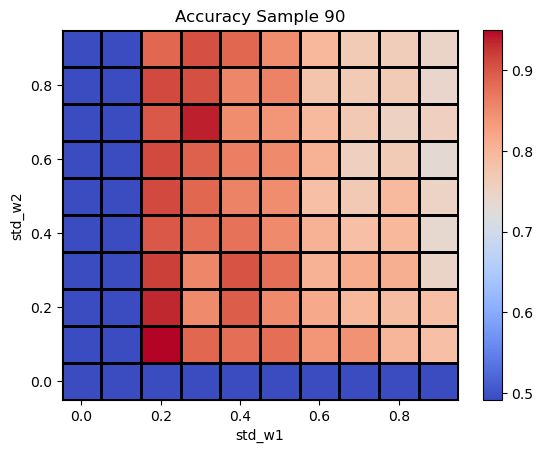

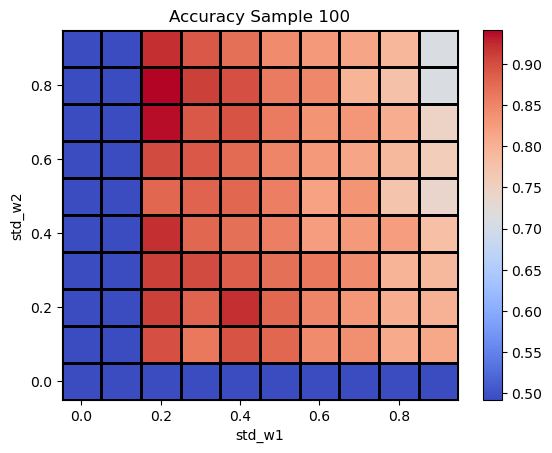

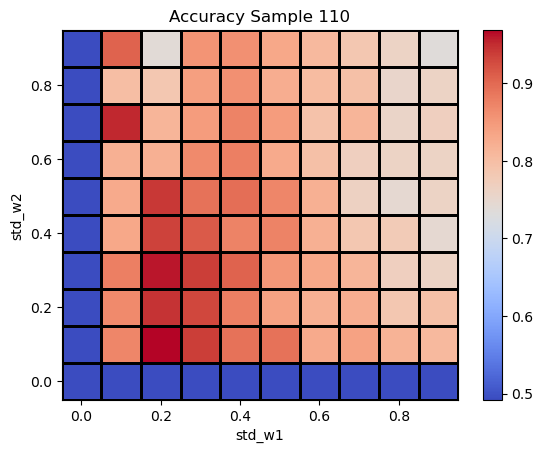

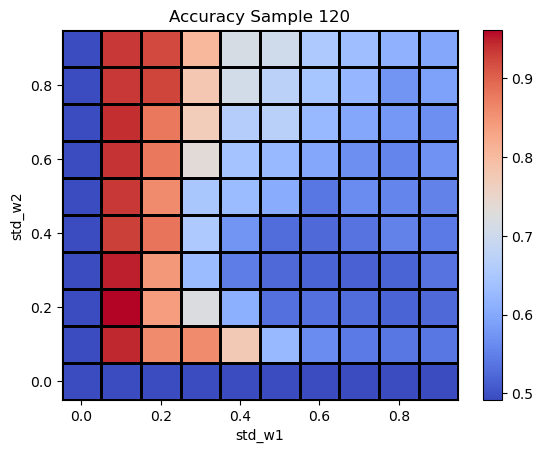

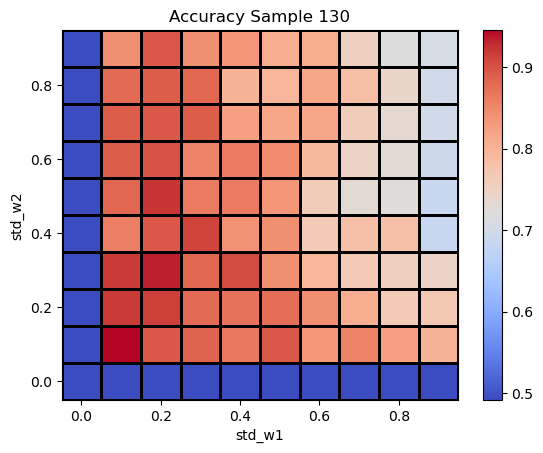

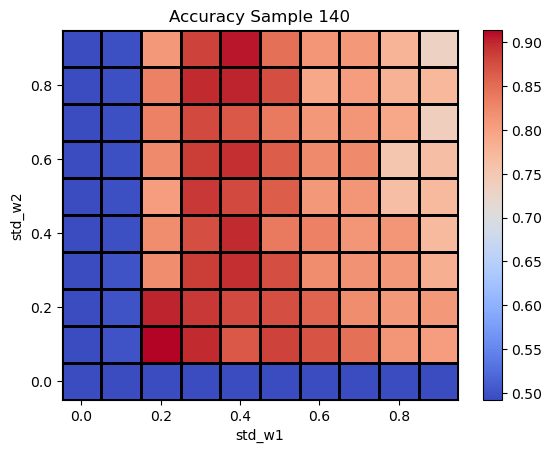

In [15]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T, cmap ='coolwarm', edgecolor='k')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("input150=accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [16]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [17]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.7453125 , 0.74375   , 0.74179688, 0.7296875 ,
        0.72617188, 0.72539062, 0.74023438, 0.72578125, 0.72890625],
       [0.4921875 , 0.9046875 , 0.90273437, 0.89570313, 0.89335937,
        0.890625  , 0.87421875, 0.87851563, 0.88398438, 0.87148437],
       [0.4921875 , 0.89882812, 0.88046875, 0.87148437, 0.87734375,
        0.86601562, 0.87539062, 0.88476562, 0.88203125, 0.87773437],
       [0.4921875 , 0.8734375 , 0.85742188, 0.85625   , 0.84492188,
        0.84648437, 0.8421875 , 0.8375    , 0.8421875 , 0.85078125],
       [0.4921875 , 0.85273438, 0.82890625, 0.82617188, 0.81289062,
        0.8140625 , 0.81054688, 0.81445312, 0.81679687, 0.81640625],
       [0.4921875 , 0.815625  , 0.81289062, 0.80039063, 0.78671875,
        0.77578125, 0.79375   , 0.79023438, 0.78984375, 0.78476563],
       [0.4921875 , 0.81445312, 0.7886718

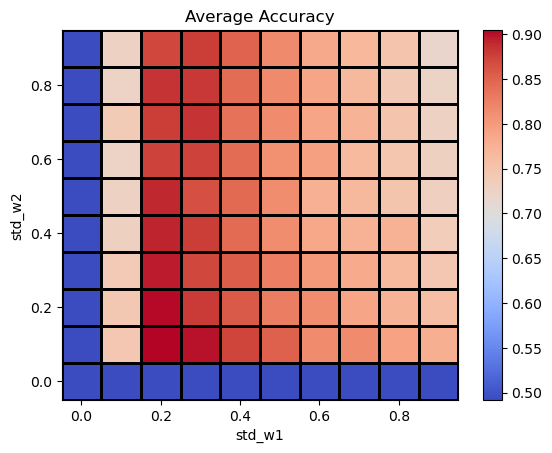

In [18]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Accuracy')


fig.savefig("average_accuracy_grid_150.png".format(sample))

0.9046875
0.4921875


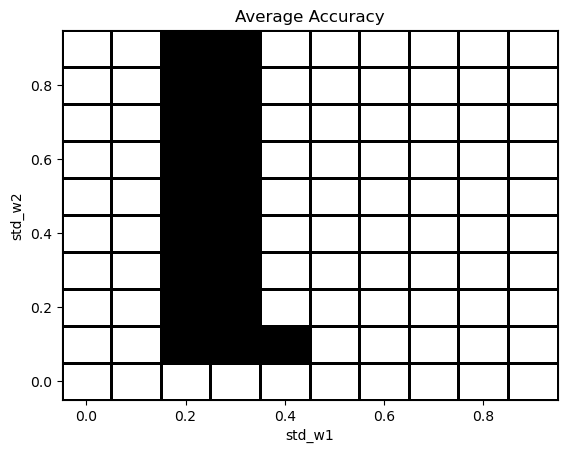

In [19]:
print(np.max(average_accuracy_grid_10_by_10_10_samples))
max_value=np.max(average_accuracy_grid_10_by_10_10_samples)
print(np.min(average_accuracy_grid_10_by_10_10_samples))
min_value=np.min(average_accuracy_grid_10_by_10_10_samples)
range_value=max_value-min_value
threshold=0.9
result_filter=average_accuracy_grid_10_by_10_10_samples >= threshold*range_value+min_value
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, result_filter.T, cmap ='binary', edgecolors='k')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Accuracy')

fig.savefig("threshold=0.9_average_accuracy_input150.png")

(0.0, 1.0)

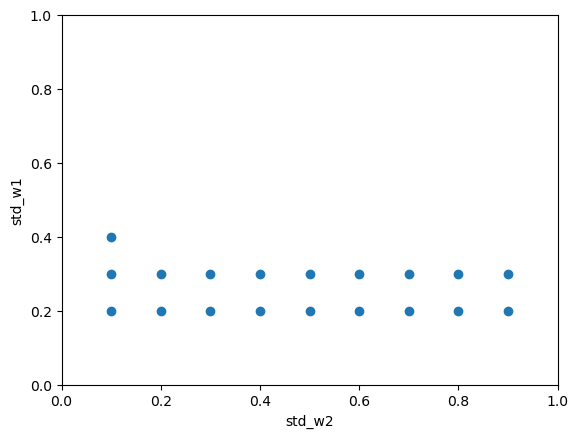

In [20]:
# get the indices where data is 1
x,y = np.argwhere(result_filter == 1).T

plt.scatter(y*0.1,x*0.1)
plt.xlabel("std_w2")
plt.ylabel("std_w1")
plt.xlim(0,1)
plt.ylim(0,1)



In [21]:
L_xx = np.sum((0.1*x)**2)-((np.sum(0.1*x))**2/x.size)

In [22]:
L_yy = np.sum((0.1*y)**2)-((np.sum(0.1*y))**2/y.size)

In [23]:
L_xy = np.sum(0.1*x*0.1*y) - ((np.sum(0.1*x))*(np.sum(0.1*y))/x.size)

In [24]:
r = L_xy/np.sqrt(L_xx*L_yy)

In [25]:
r

-0.18986327734832503

In [26]:
np.corrcoef(0.1*y,0.1*x)

array([[ 1.        , -0.18986328],
       [-0.18986328,  1.        ]])